In [1]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

api = wandb.Api()


wandb: Loaded settings from
wandb:   /Users/cty453/codespace/CSE256/CSE256_PA1_WI26/wandb/settings
wandb: [wandb.Api()] Loaded credentials for https://api.wandb.ai from /Users/cty453/.netrc.


In [ ]:
runs = [
    "chentianyi453/CSE256_PA1_DAN_relu/ic0277kf",
    "chentianyi453/CSE256_PA1_DAN_relu/j8doxj3y",
    "chentianyi453/CSE256_PA1_DAN_relu/svgwyqfo",
    "chentianyi453/CSE256_PA1_DAN_relu/qdbkqedn",
    "chentianyi453/CSE256_PA1_DAN_relu/vpcwnbr8",
    "chentianyi453/CSE256_PA1_DAN_relu/xxkfvxr3",
    "chentianyi453/CSE256_PA1_DAN_relu/spkfiy1r",
    "chentianyi453/CSE256_PA1_DAN_relu/fkz8dsa2",
    "chentianyi453/CSE256_PA1_DAN_relu/g9s0ko1k",
    "chentianyi453/CSE256_PA1_DAN_relu/oob03v5q",
    "chentianyi453/CSE256_PA1_DAN_relu/4bay35wi",
    "chentianyi453/CSE256_PA1_DAN_relu/3hb8sh0d",
    "chentianyi453/CSE256_PA1_DAN_relu/f9zaqgik",
    "chentianyi453/CSE256_PA1_DAN_relu/qiq34uxw",
    "chentianyi453/CSE256_PA1_DAN_relu/djy51x45"
]
data = [api.run(run).history() for run in runs]

In [12]:
run = api.run("chentianyi453/CSE256_PA1_DAN_relu/xxkfvxr3")
run.config

{'lr': 0.0001,
 'model': 'DAN',
 'epochs': 100,
 'dropout': True,
 'emb_dim': 300,
 'batch_size': 16,
 'hidden_dim': 500,
 'dropout_rate': 0.2,
 'weight_decay': 0.0001,
 'train_unk_token': True,
 'freeze_embedding': True,
 'num_hidden_layers': 2,
 'use_cosine_scheduler': False,
 'load_pretrained_embedding': True}

In [3]:
def plot(run_indices, new_names, data):
    """
    run_indices: list[int], 1-based index of runs
    new_names: list[str], legend names
    data: list[pd.DataFrame], one DataFrame per run
    """

    assert len(run_indices) == len(new_names), \
        "run_indices and new_names must have the same length"

    metrics = [
        ("train/loss", "train_loss"),
        ("train/accuracy", "train_acc"),
        ("dev/loss", "dev_loss"),
        ("dev/accuracy", "dev_acc"),
    ]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for ax, (col_name, title) in zip(axes, metrics):
        for idx, name in zip(run_indices, new_names):
            run_idx = idx - 1  # 1-based -> 0-based
            assert 0 <= run_idx < len(data), f"run index {idx} out of range"

            df = data[run_idx]
            assert col_name in df.columns, f"{col_name} not found in run {idx}"

            step = df.index
            values = df[col_name]

            ax.plot(step, values, label=name)

        ax.set_title(title)
        ax.set_xlabel("Step")
        ax.set_ylabel(title)
        ax.grid(True)

    # 只放一个全局 legend，避免重复
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=len(new_names))

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [4]:
names = [f"{id+1} " + api.run(run).name for id, run in enumerate(runs)]
names

['1 DAN_emb300_layers2_hidden100_dropout0.2_wd0.0001_train-unk',
 '2 DAN_emb300_layers0_hidden100_dropout0.2_wd0.0001_train-unk',
 '3 DAN_emb300_layers1_hidden100_dropout0.2_wd0.0001_train-unk',
 '4 DAN_emb300_layers3_hidden100_dropout0.2_wd0.0001_train-unk',
 '5 DAN_emb300_layers2_hidden300_dropout0.2_wd0.0001_train-unk',
 '6 DAN_emb300_layers2_hidden500_dropout0.2_wd0.0001_train-unk',
 '7 DAN_emb50_layers2_hidden100_dropout0.2_wd0.0001_train-unk',
 '8 DAN_emb300_layers2_hidden100_dropout0.2_wd0.0001_train-unk',
 '9 DAN_emb300_layers2_hidden100_dropout0.5_wd0.0001_train-unk',
 '10 DAN_emb300_layers2_hidden100_dropout0.2_cosine_wd0.0001_train-unk',
 '11 DAN_emb300_layers2_hidden100_dropout0.2_wd0.001_train-unk',
 '12 DAN_emb300_layers2_hidden100_dropout0.2_wd0.0001_train-unk',
 '13 DAN_emb300_layers2_hidden100_dropout0.2_wd0.0001_train-unk',
 '14 DAN_emb300_layers2_hidden100_dropout0.2_cosine_wd0.0001_train-unk',
 '15 DAN_emb300_layers3_hidden200_dropout0.2_wd0.0001_train-unk']

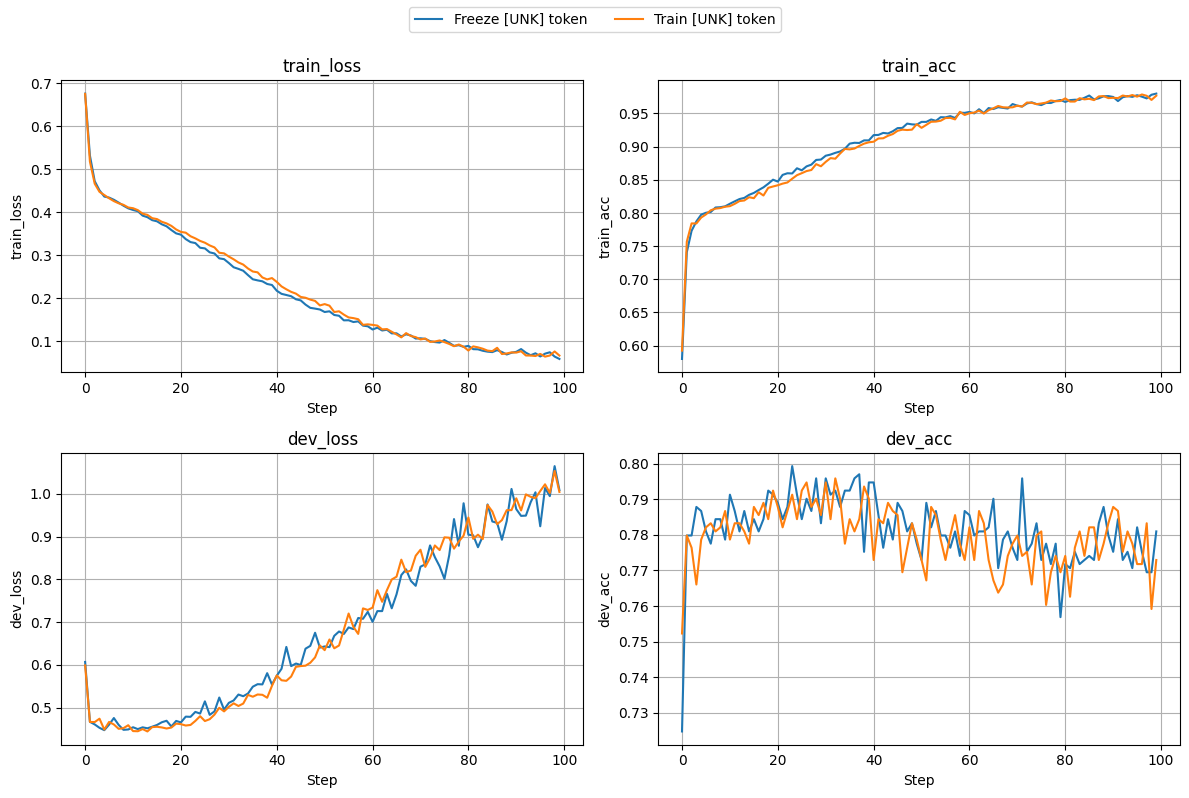

In [7]:
plot(
    run_indices=[1, 13],
    new_names=[f"Freeze [UNK] token", f"Train [UNK] token"],
    data=data
)